# Python 実践データ分析 100本ノック
## 第3部 実践編②：最適化問題
### 第⑥章 物流の最適ルートをコンサルティングする10本ノック

#### ノック51：物流に関するデータを読み込んでみよう

In [1]:
import pandas as pd
factories = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/tbl_factory.csv")
factories.head()

,FCID,FCName,FCDemand,FCRegion
0,FC00001,東京工場,28,関東
1,FC00002,木更津工場,29,関東
2,FC00003,多摩工場,31,関東
3,FC00004,横須賀工場,25,関東
4,FC00005,仙台工場,21,東北


In [2]:
warehouses = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/tbl_warehouse.csv")
warehouses.head()

,WHID,WHName,WHSupply,WHRegion
0,WH00001,杉並倉庫,35,関東
1,WH00002,品川倉庫,41,関東
2,WH00003,豊洲倉庫,42,関東
3,WH00004,郡山倉庫,60,東北
4,WH00005,仙台倉庫,72,東北


In [8]:
cost = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [6]:
trans = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/tbl_transaction.csv", index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [9]:
join_data = pd.merge(trans, cost, left_on=["ToFC", "FromWH"], right_on=["FCID", "WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [10]:
join_data = pd.merge(join_data, factories, on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [11]:
join_data = pd.merge(join_data, warehouses, on="WHID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東,品川倉庫,41,関東


In [13]:
join_data = join_data[["TransactionDate", "Quantity", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [14]:
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [15]:
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


#### ノック52：現状の輸送費、コストを確認してみよう

In [17]:
print("関東支社の総コスト："+str(kanto["Cost"].sum())+"万円")
print("東北支社の総コスト："+str(tohoku["Cost"].sum())+"万円")

関東支社の総コスト：2189.3万円
東北支社の総コスト：2062.0万円


In [18]:
print("関東支社の総部品輸送個数："+str(kanto["Quantity"].sum())+"個")
print("東北支社の総部品輸送個数："+str(tohoku["Quantity"].sum())+"個")

関東支社の総部品輸送個数：49146個
東北支社の総部品輸送個数：50214個


In [26]:
tmp = ((kanto["Cost"].sum()/kanto["Quantity"].sum())*10000).round()
print("関東支社の単位部品あたり輸送量："+str(tmp)+"円/個")

関東支社の単位部品あたり輸送量：445.0円/個


In [27]:
tmp = ((tohoku["Cost"].sum()/kanto["Quantity"].sum())*10000).round()
print("東北支社の単位部品あたり輸送量："+str(tmp)+"円/個")

東北支社の単位部品あたり輸送量：420.0円/個


In [37]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
cost_chk.head()

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,東京工場,28,関東
1,FC00001,WH00002,0.8,東京工場,28,関東
2,FC00001,WH00003,1.5,東京工場,28,関東
3,FC00002,WH00001,0.9,木更津工場,29,関東
4,FC00002,WH00002,0.8,木更津工場,29,関東


In [39]:
print("関東支社の平均輸送コスト："+str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean())+"万円")
print("東北支社の平均輸送コスト："+str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean())+"万円")

関東支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


#### ノック53：ネットワークを可視化してみよう

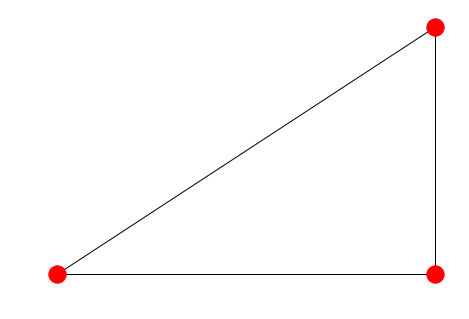

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos = {}
pos["nodeA"] = (0,0)
pos["nodeB"] = (1,1)
pos["nodeC"] = (1,0)

nx.draw(G, pos)
plt.show()

#### ノック54：ネットワークにノードを追加してみよう

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


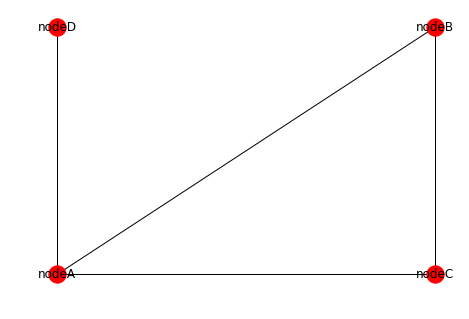

In [44]:
G.add_node("nodeD")
G.add_edge("nodeA", "nodeD")
pos["nodeD"] = (0,1)

nx.draw(G, pos, with_labels=True)
plt.show()

#### ノック55：ルートの重み付けを実施しよう

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_w = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/network_weight.csv")
df_p = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/network_pos.csv")

size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
G = nx.Graph()    

In [47]:
df_w.head()

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [48]:
df_p.head()

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


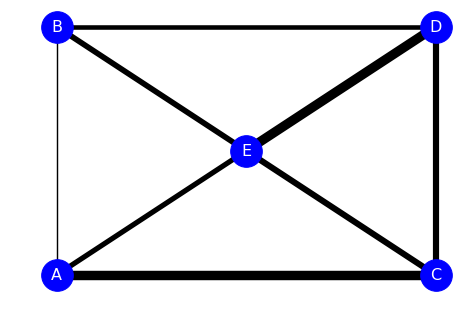

In [50]:
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color="blue", font_color="white", width=edge_weights)
plt.show()

#### ノック56：輸送ルート情報を読み込んでみよう

In [62]:
df_tr = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route.csv", index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [80]:
df_pos = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route_pos.csv")
df_pos.head()

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


#### ノック57：輸送ルート情報からネットワークを可視化してみよう

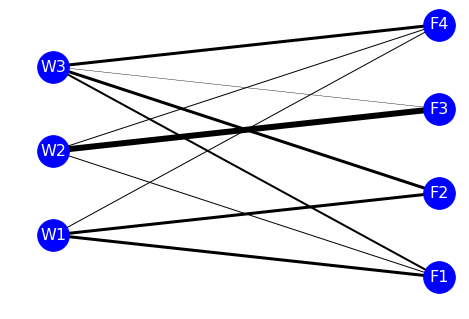

In [88]:
size = 0.2
edge_weights = []
for i in range(len(df_tr)):
    for j in range(len(df_tr.columns)):
        edge_weights.append(df_tr.iloc[i][j]*size)

G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

for i in range(len(df_tr.columns)):
    for j in range(len(df_tr.index)):
        G.add_edge(df_tr.columns[i], df_tr.index[j])

pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color="blue", font_color="white", width=edge_weights)
plt.show()

#### ノック58：輸送コスト関数を作成しよう

In [89]:
df_tr = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route.csv", index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [90]:
df_tc = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_cost.csv", index_col="工場")
df_tc.head()

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [131]:
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tr.columns)):
        for j in range(len(df_tr.index)):
            cost += (df_tr.iloc[j][i]) * (df_tc.iloc[j][i])
    return cost
trans_cost(df_tr, df_tc)

1493

#### ノック59：制約条件を作ってみよう

In [102]:
df_tr = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route.csv", index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [104]:
df_demand = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/demand.csv")
df_demand.head()

,F1,F2,F3,F4
0,28,29,31,25


In [105]:
df_supply = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/supply.csv")
df_supply.head()

,W1,W2,W3
0,35,41,42


In [115]:
#需要側の制約条件
for i in range(len(df_demand.columns)):
    trans_sum = df_tr[df_demand.columns[i]].sum()
    print(str(df_demand.columns[i]+"への輸送量："+str(trans_sum)+"　需要量："+str(df_demand.iloc[0][i])))
    if (trans_sum >= df_demand.iloc[0][i]):
        print("需要量を満たしています。")
    else:
        print("【WARNING！】需要量を満たしていません。")

F1への輸送量：30　需要量：28
需要量を満たしています。
F2への輸送量：30　需要量：29
需要量を満たしています。
F3への輸送量：32　需要量：31
需要量を満たしています。
F4への輸送量：25　需要量：25
需要量を満たしています。


In [123]:
#供給側の制約条件
for i in range(len(df_supply.columns)):
    trans_sum = df_tr.loc[df_supply.columns[i]].sum()
    print(str(df_supply.columns[i]+"からの輸送量："+str(trans_sum)+"　供給限界："+str(df_supply.iloc[0][i])))
    if (trans_sum <= df_supply.iloc[0][i]):
        print("供給限界の範囲内です。")
    else:
        print("【WARNING！】供給限界を超えています。")

W1からの輸送量：35　供給限界：35
供給限界の範囲内です。
W2からの輸送量：40　供給限界：41
供給限界の範囲内です。
W3からの輸送量：42　供給限界：42
供給限界の範囲内です。


#### ノック60：輸送ルートを変更して、輸送コスト関数の変化を確認しよう

In [133]:
df_tr_new = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route_new.csv", index_col=0) 
df_tr_new.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [134]:
print("総輸送コスト："+str(trans_cost(df_tr_new, df_tc)))

総輸送コスト：1428


In [135]:
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        trans_sum = df_tr[df_demand.columns[i]].sum()
        if (trans_sum >= df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

In [147]:
def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        trans_sum = df_tr.loc[df_supply.columns[i]].sum()
        if (trans_sum <= df_supply.iloc[0][i]):
            flag[i] = 1
    return flag

In [148]:
print("需要条件 判定結果："+ str(condition_demand(df_tr_new, df_demand)))
print("供給条件 判定結果："+ str(condition_supply(df_tr_new, df_supply)))

需要条件 判定結果：[1. 1. 1. 1.]
供給条件 判定結果：[1. 0. 1.]
